True Beacon Assignment- Swapnil Shekhar

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts


In [35]:
# prompt: import a .parquet file using pandas and print the head of the data

import pandas as pd

# Used online tool to convert Paraquet to CSV
# read_paraquet() function said file is corrupt
# Read the csv file into a Pandas DataFrame
columns = ['A','B','TTE','DandT']
df = pd.read_csv('data.csv', names = columns)

# Print the head of the DataFrame
print(df.head())


          A         B  TTE             DandT
0  0.286058  0.199729   27  01-01-2021 09:15
1  0.285381  0.200433   27  01-01-2021 09:16
2  0.284233  0.200004   27  01-01-2021 09:17
3  0.286104  0.199860   27  01-01-2021 09:18
4  0.285539  0.198951   27  01-01-2021 09:19


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690512 entries, 0 to 690511
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   A       688821 non-null  float64
 1   B       688398 non-null  float64
 2   TTE     690512 non-null  int64  
 3   DandT   690512 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 21.1+ MB


In [37]:
df['DandT'] = pd.to_datetime(df['DandT'])

df = df[(df['DandT'].dt.time >= pd.to_datetime('9:15').time())&
        (df['DandT'].dt.time <= pd.to_datetime('15:30').time())]
df.fillna(method='ffill',inplace=True)

<ipython-input-37-0132c79bf78a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(method='ffill',inplace=True)


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180856 entries, 0 to 690511
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   A       180856 non-null  float64       
 1   B       180856 non-null  float64       
 2   TTE     180856 non-null  int64         
 3   DandT   180856 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 6.9 MB


In [105]:
# df['A'] = df['A'].interpolate()
# df['B'] = df['B'].interpolate()

This shows that the indices are highly correlated with a correlation coefficient of 0.89.

In [106]:
d = df[['A','B']]
d.corr()

,A,B
A,1.000000,0.897279
B,0.897279,1.000000


In [107]:
spread = df['B'] - df['A']

In [108]:
def sharpe_ratio(returns, risk_free_rate):
    excess_returns = returns - risk_free_rate
    mean_excess_return = np.mean(excess_returns)
    std_excess_return = np.std(excess_returns)
    sharpe = mean_excess_return / std_excess_return
    return sharpe

In [109]:
# df['Daily_Return'] = df['Spread'].pct_change()
# print(len(df['Daily_Return']))
# print(len(df['Spread']))
# print(len(df['A']))

In [110]:
# risk_free_rate = 0.02
# sharpe = sharpe_ratio(df['Daily_Return'],risk_free_rate)
# print("Sharpe Ratio: ",sharpe)

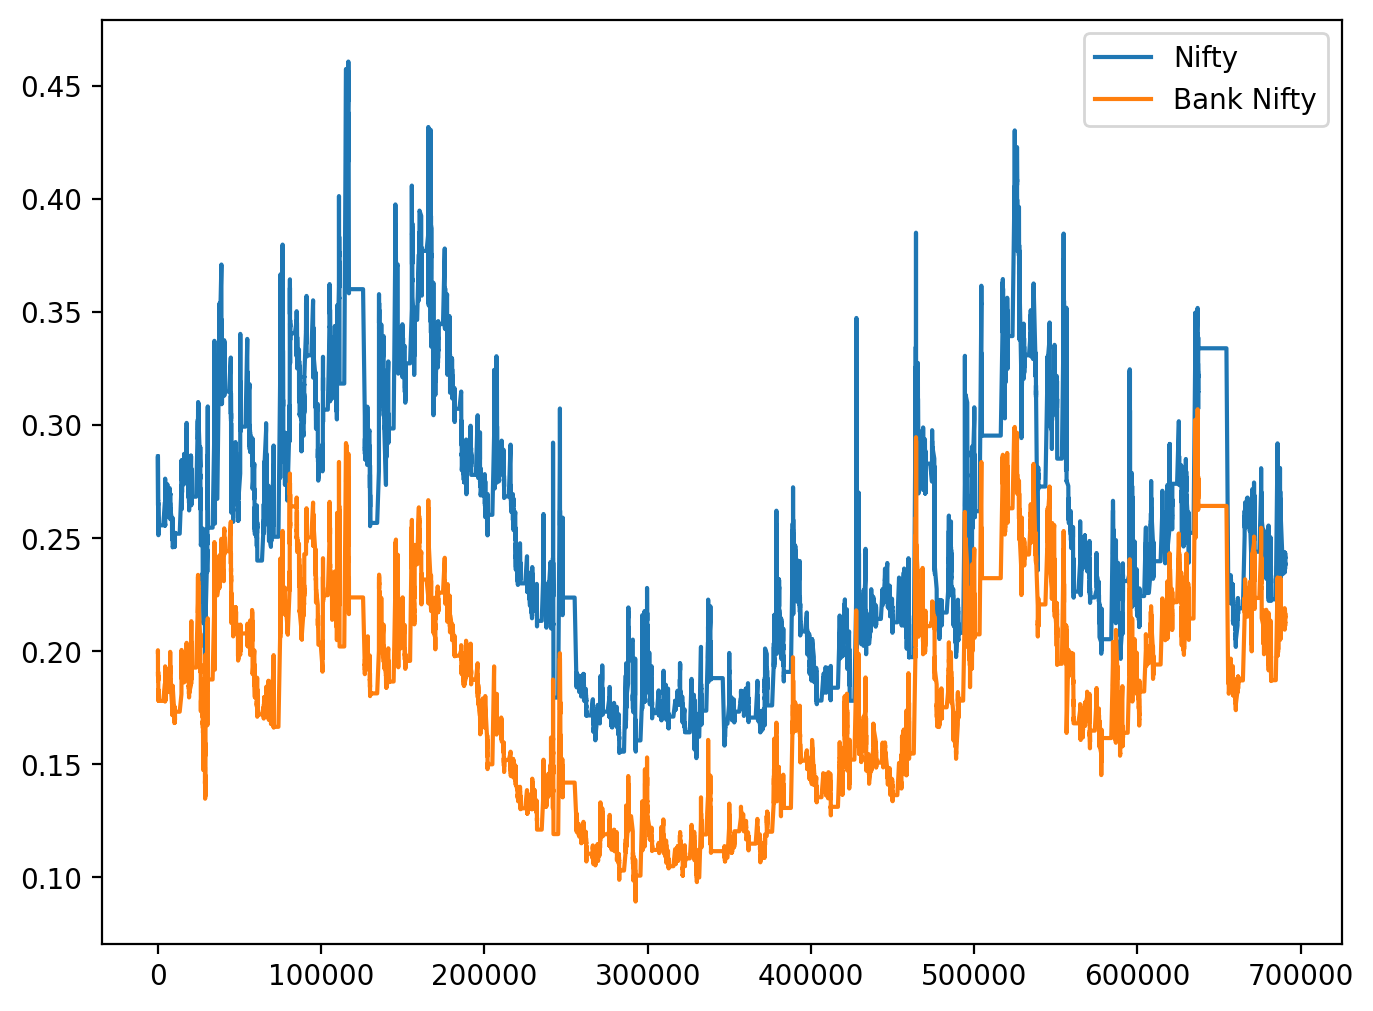

In [111]:
# plotting the  datapoints
plt.figure(figsize=(8, 6), dpi=200)
NIF = df['A']
BNIF = df['B']

plt.plot(NIF, label="Nifty")
plt.plot(BNIF, label = "Bank Nifty")
plt.legend()


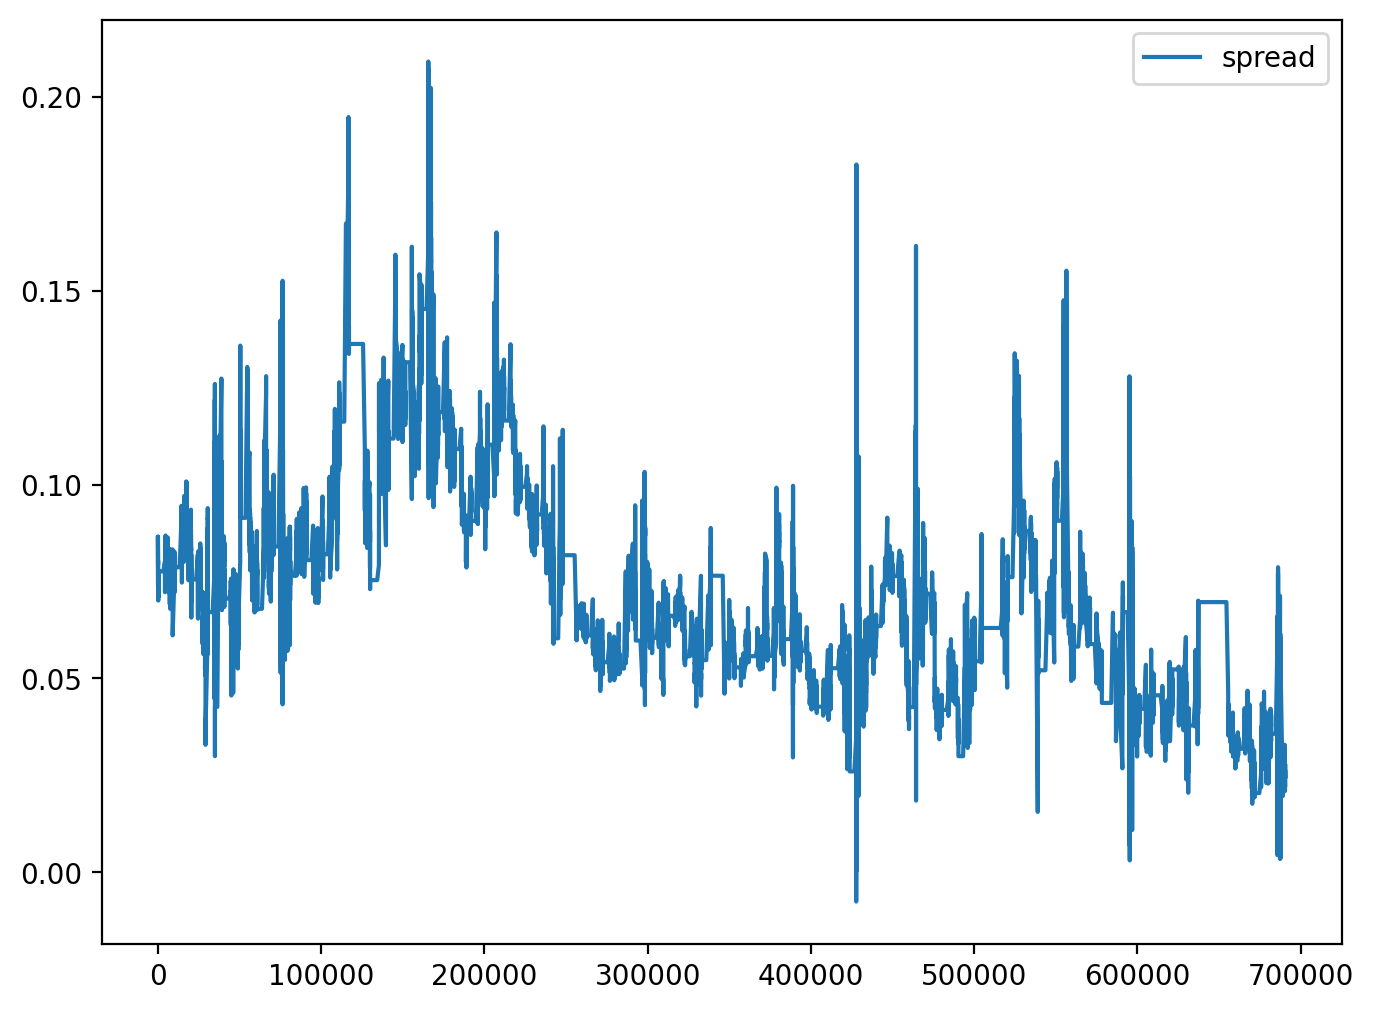

In [112]:
plt.figure(figsize=(8,6),dpi = 200)
plt.plot(NIF - BNIF, label='spread')
plt.legend()

In [113]:
#res = ts.coint(NIF,BNIF)

Null Hypothesis H0 : Cointegration Does not exist
H1 : Cointegration exists

In [17]:
# cointegration = res[0]
# p_val = res[1]
# #print(res[2])
# print("Performing the Engle-Granger two-step cointegration test")
# if p_val < 0.05:
#   print("Cointegration Exists, P-value: ",p_val)
# else:
#   print("Cointegration Doesn't Exists, P-value: ",p_val)

In [18]:
# NIF_ADF = ts.adfuller(NIF)
# print('P value for the Augmented Dickey-Fuller Test is', NIF_ADF[1])

# BNIF_ADF = ts.adfuller(BNIF)
# print('P value for the Augmented Dickey-Fuller Test is', BNIF_ADF[1])

# SPREAD_ADF = ts.adfuller(NIF - BNIF)
# print('P value for the Augmented Dickey-Fuller Test is', SPREAD_ADF[1])

# RATIO_ADF = ts.adfuller(NIF/BNIF)
# print('P value for the Augmented Dickey-Fuller Test is', RATIO_ADF[1])

# Linear Regression Based Model
Using residuals

In [48]:
from sklearn.linear_model import LinearRegression
# The next two lines does the regression
lm_model = LinearRegression(copy_X=True, fit_intercept=True)
lm_model.fit(df['A'].values.reshape(-1,1), df['B'])
print('parameters: %.7f, %.7f' %(lm_model.intercept_, lm_model.coef_))

parameters: 0.0009952, 0.7112374


<ipython-input-48-8052744456ed>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('parameters: %.7f, %.7f' %(lm_model.intercept_, lm_model.coef_))


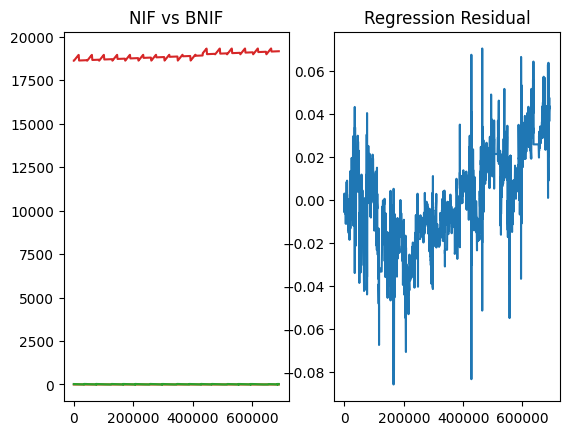

In [49]:
# present the graph
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].set_title('NIF vs BNIF')
ax[0].plot(df)
yfit = lm_model.coef_ * df['A'] + lm_model.intercept_
y_residual = df['B'] - yfit
ax[1].set_title('Regression Residual')
ax[1].plot(y_residual)
plt.show()

In [50]:
from scipy.stats.stats import pearsonr
print('Pearson correlation coefficient:%.7f' %(pearsonr(df['A'], df['B'])[0]))

Pearson correlation coefficient:0.8972790


<ipython-input-50-49edf44652ab>:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


Text(0.5, 1.0, 'Price Ratio between Nifty and Bank Nifty')

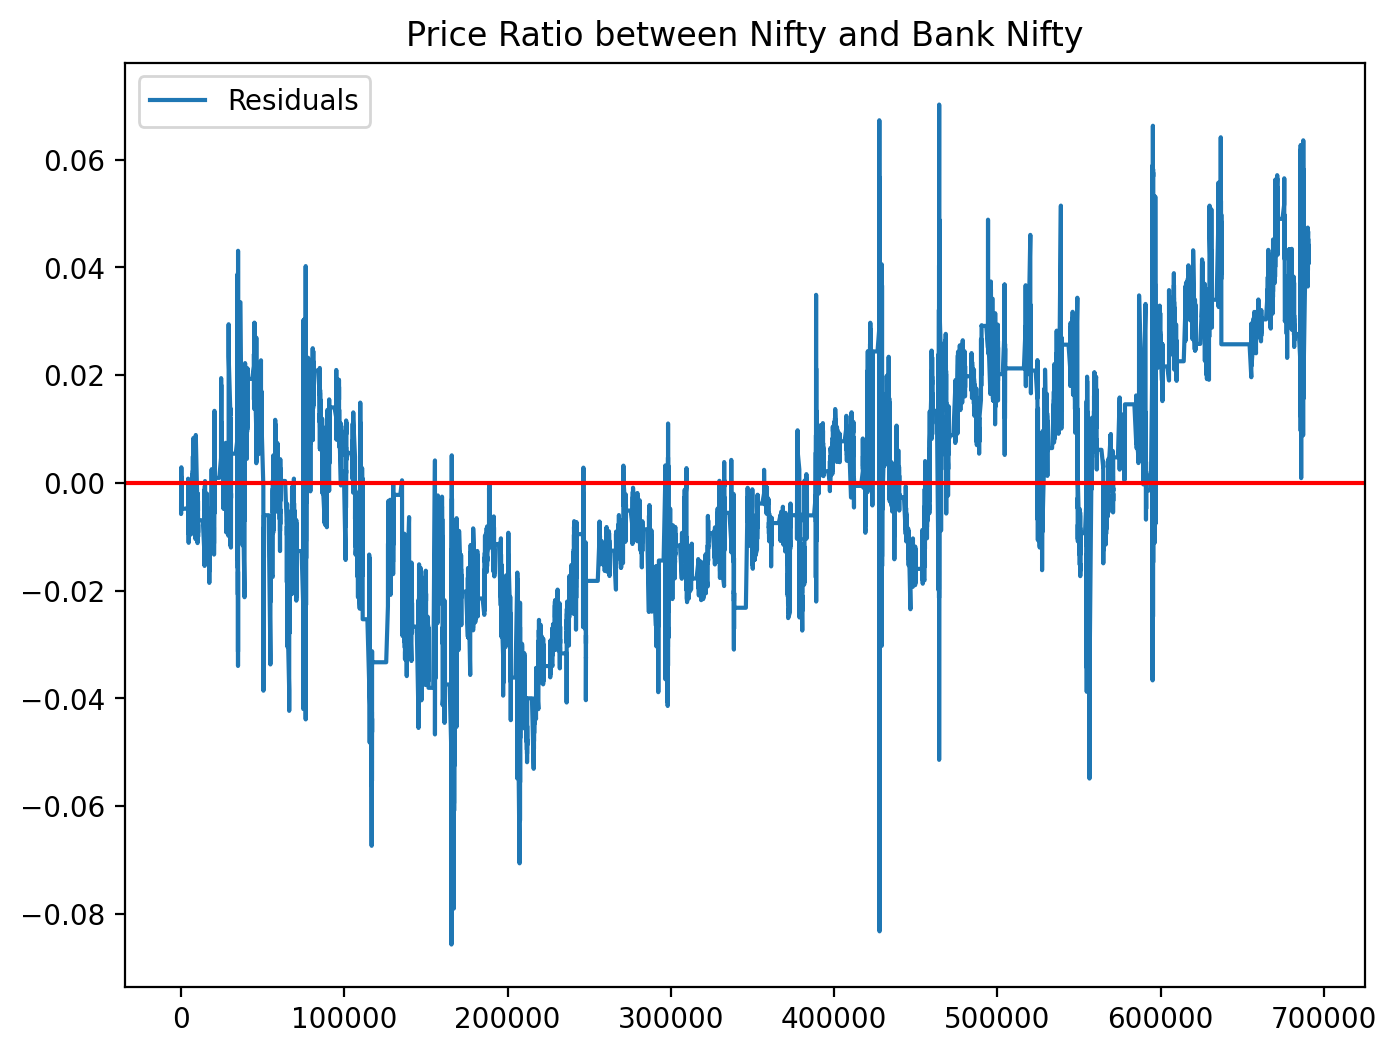

In [52]:
plt.figure(figsize=(8, 6), dpi=200)

plt.plot(y_residual, label = 'Residuals')
plt.axhline(y_residual.mean(), color='red')
plt.legend()
plt.title("Price Ratio between Nifty and Bank Nifty")

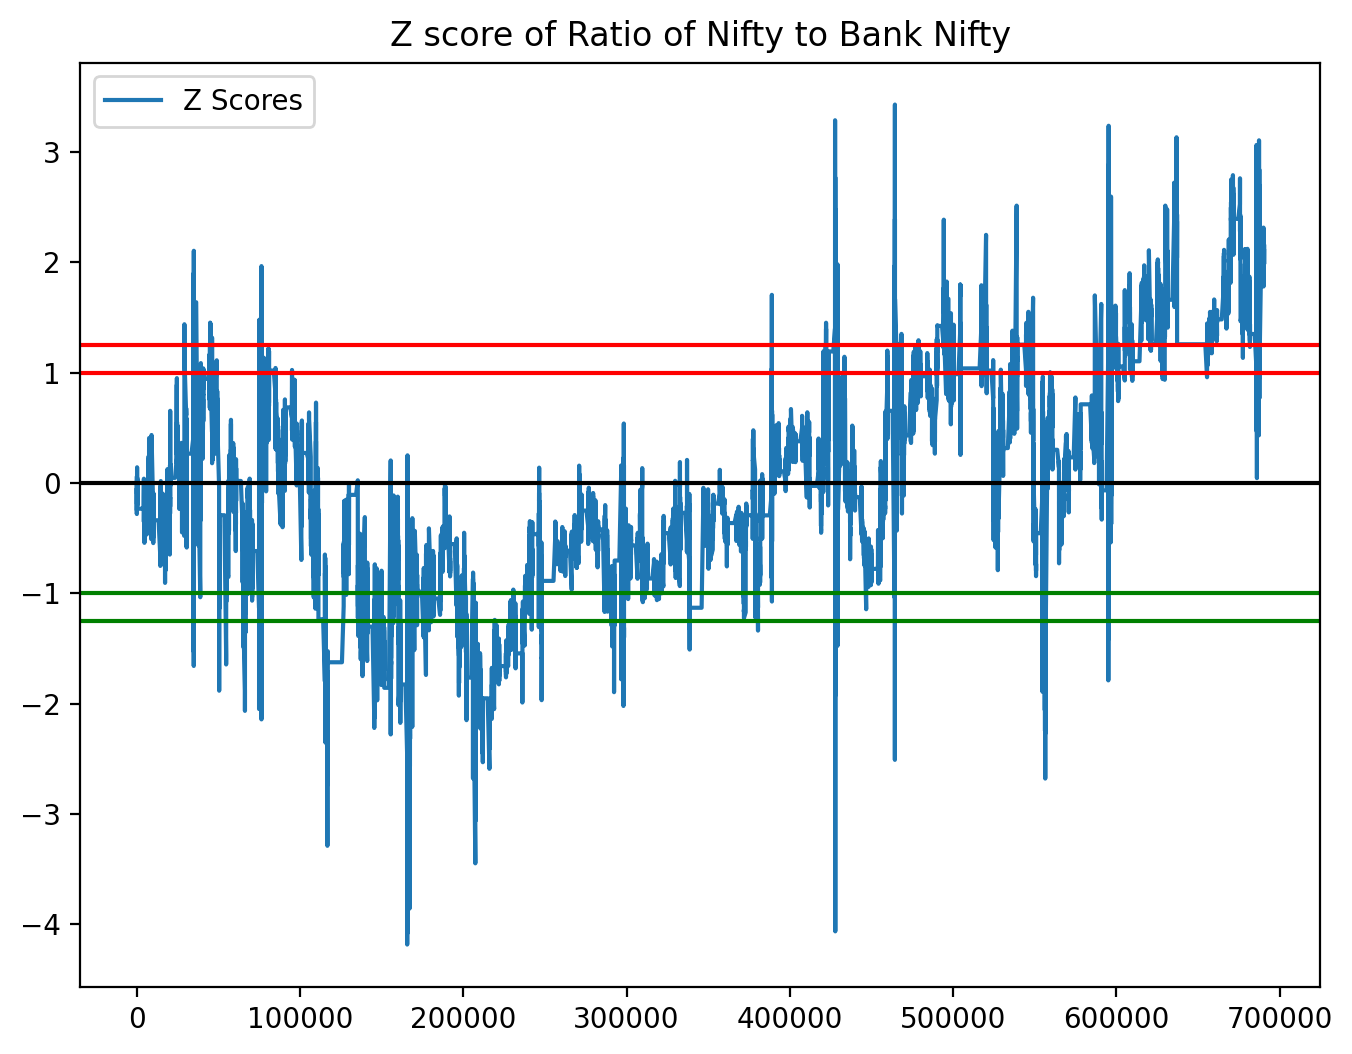

In [54]:
plt.figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (y_residual - y_residual.mean())/y_residual.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of Nifty to Bank Nifty')
plt.show()

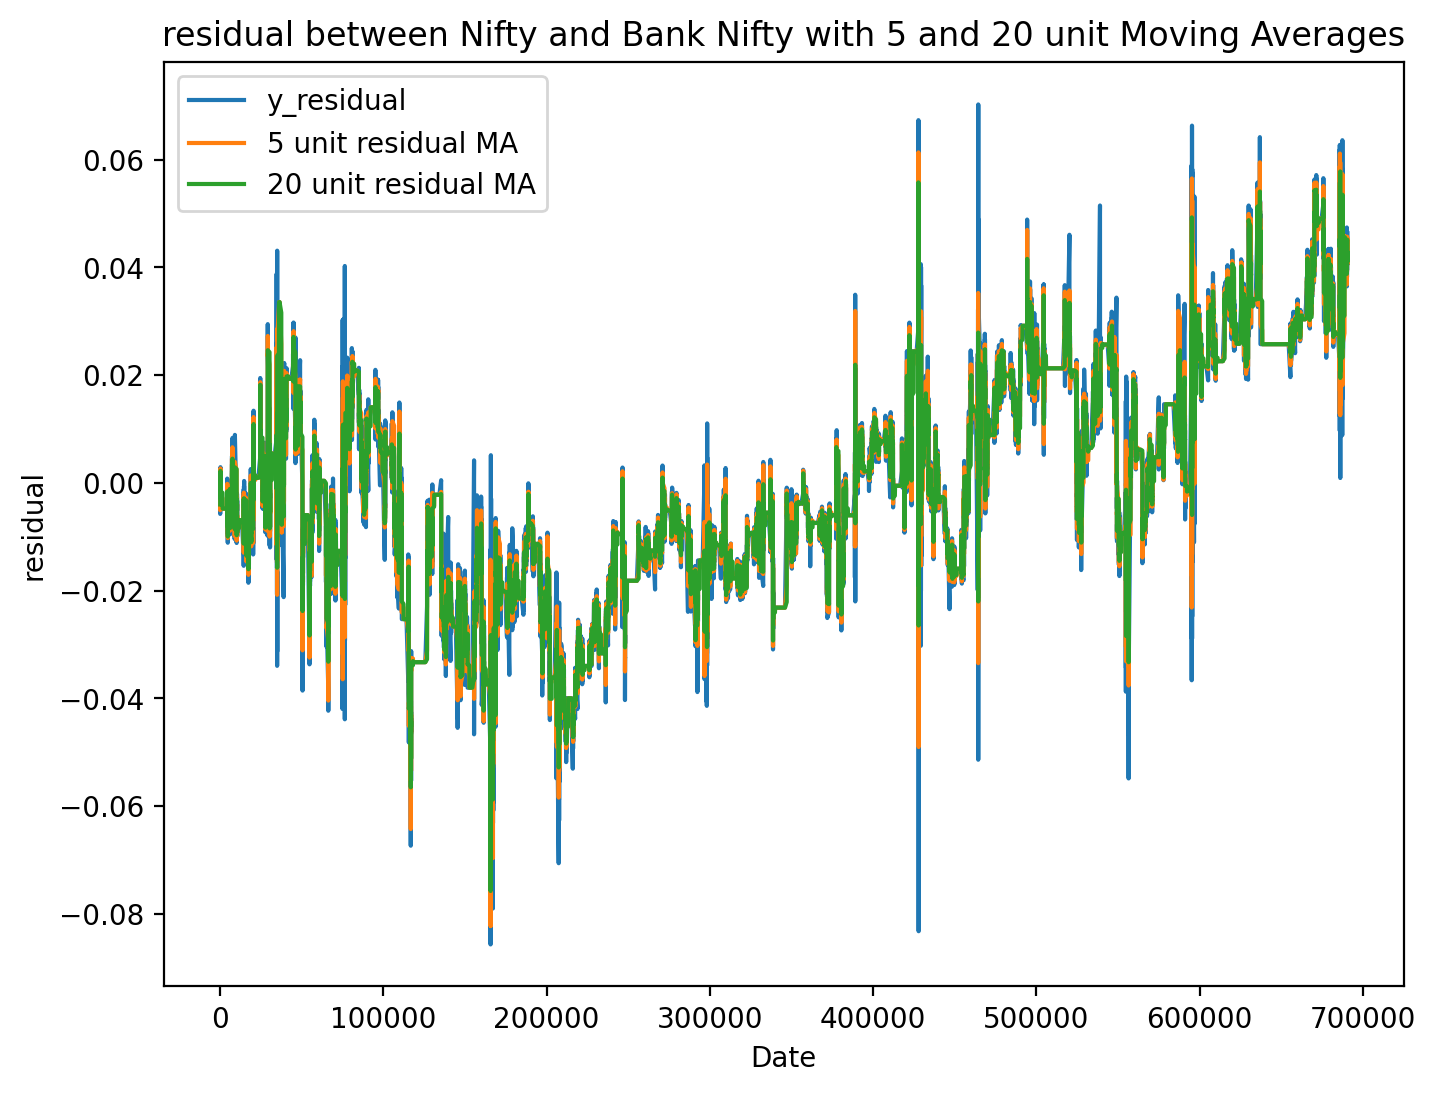

In [55]:
plt.figure(figsize=(8, 6), dpi=200)
y_residuals_mavg5 = y_residual.rolling(window=5, center=False).mean()
y_residuals_mavg20 = y_residual.rolling(window=20, center=False).mean()
std_20 = y_residual.rolling(window=20, center=False).std()
zscore_20_5 = (y_residuals_mavg5 - y_residuals_mavg20)/std_20
plt.plot(y_residual.index, y_residual.values)
plt.plot(y_residuals_mavg5.index, y_residuals_mavg5.values)
plt.plot(y_residuals_mavg20.index, y_residuals_mavg20.values)
plt.legend(['y_residual', '5 unit residual MA', '20 unit residual MA'])
plt.xlabel('Date')
plt.ylabel('residual')
plt.title('residual between Nifty and Bank Nifty with 5 and 20 unit Moving Averages')
plt.show()

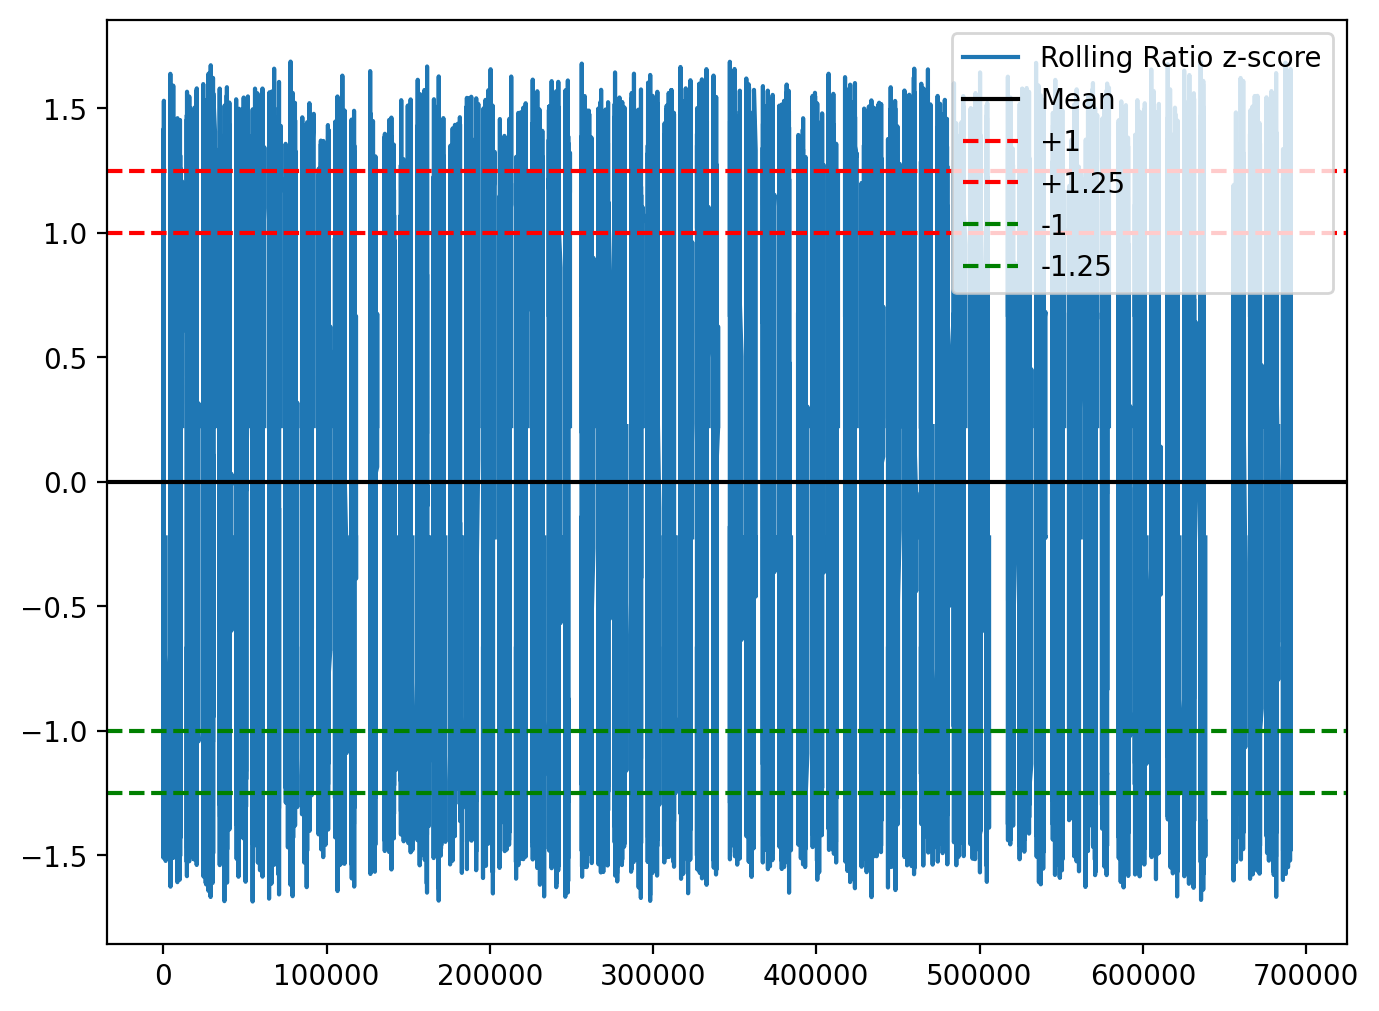

In [56]:
plt.figure(figsize=(8, 6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

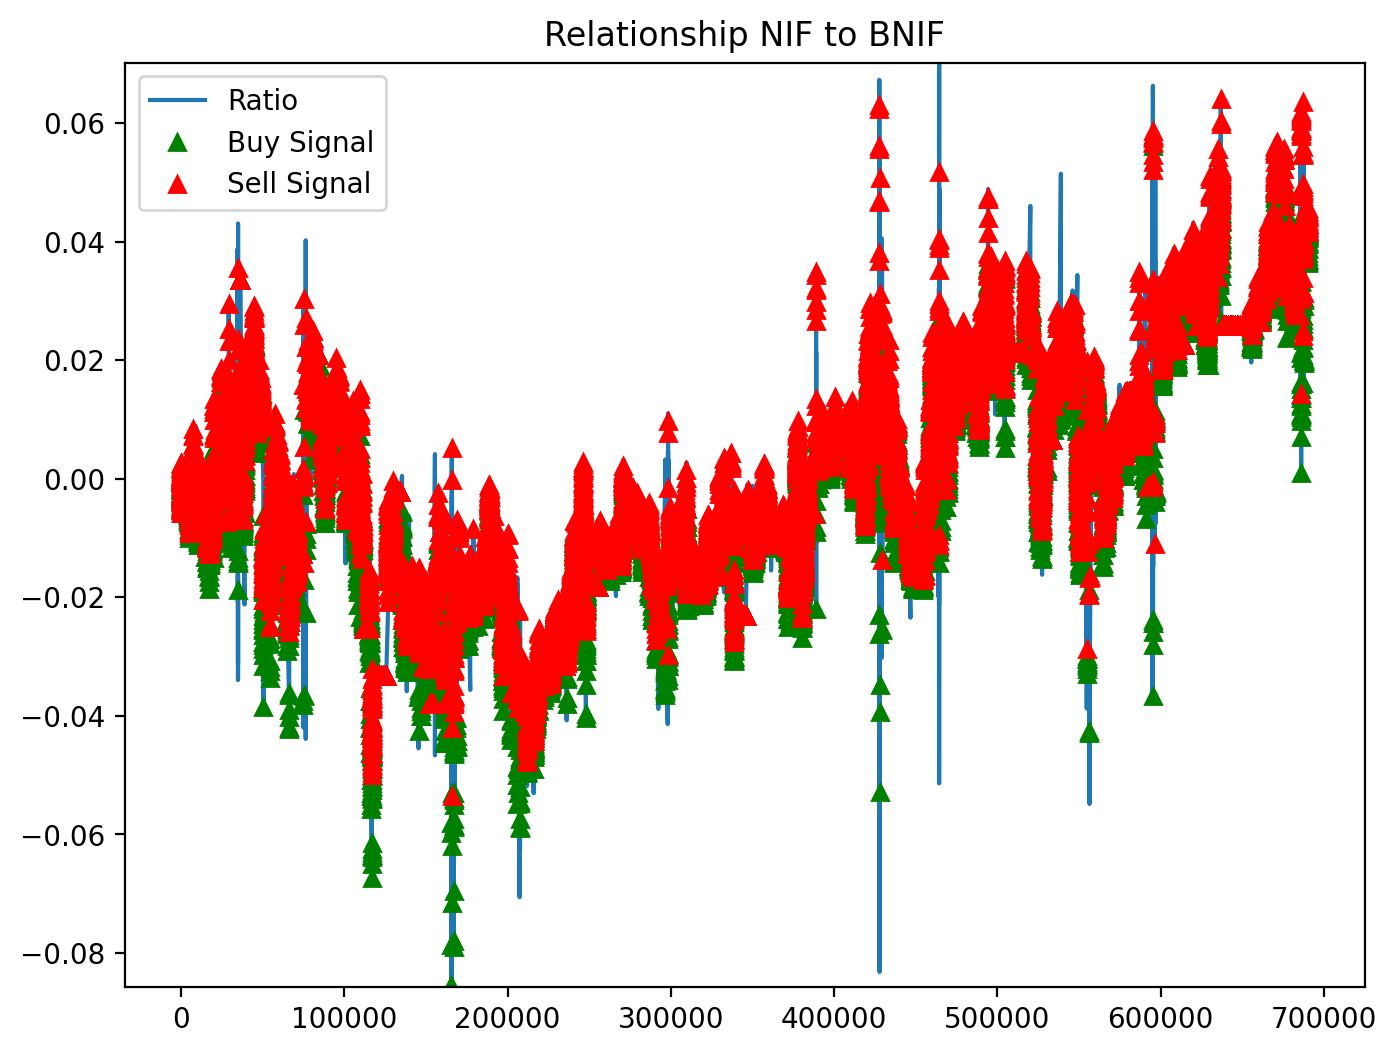

In [59]:
plt.figure(figsize=(8, 6), dpi=200)
y_residual.plot()
buy = y_residual.copy()
sell = y_residual.copy()
buy[zscore_20_5>-1] = 1
sell[zscore_20_5<1] = -1
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y_residual.min(), y_residual.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship NIF to BNIF')
plt.show()

# **Final Trading Strategy**
Making Two types of trade based on the z-score \
z-score > 1 \
Trade 1; Short A Long B \
z-score < -1 \
Trade 2; Long A Short B\

Exit Strategy: \
Trade 1- Z_score becomes 0.5 \
Trade 2- Z_score becomes -0.5

In [71]:
snif = []
lnif = []

sbnif = []
lbnif = []

exit = []
vol = []
inTrade1 = False
inTrade2 = False

for iva,ivb,z in zip(df['A'],df['B'],zscore_20_5):
  if z > 1 and not inTrade1:
    #short nifty
    #long bank nifty
    snif.append(True)
    lnif.append(False)
    sbnif.append(False)
    lbnif.append(True)
    vol.append([iva,ivb])
    inTrade1 = True
  elif z<0.5 and z>0 and inTrade1:
    #exit trade 1
    snif.append(False)
    lnif.append(False)
    sbnif.append(False)
    lbnif.append(False)
    vol.append([iva,ivb])
    inTrade1 = False
  elif z<-1 and not inTrade2:
    # long bank nifty
    # short nifty
    sbnif.append(True)
    lbnif.append(False)
    snif.append(False)
    lnif.append(True)
    vol.append([iva,ivb])
    inTrade2 = True
  elif z>-0.5 and z<=0 and inTrade2:
    # exit trade 2
    snif.append(True)
    lnif.append(True)
    sbnif.append(True)
    lbnif.append(True)
    inTrade2 = False
    vol.append([iva,ivb])

print(vol)

[[0.277114, 0.194556], [0.2701375, 0.192486], [0.269065, 0.190697], [0.2665085, 0.1907175], [0.266569, 0.190586], [0.2679715, 0.1902505], [0.2700105, 0.1902025], [0.26789, 0.188555], [0.266525, 0.1906775], [0.2667925, 0.1888385], [0.267296, 0.187969], [0.265901, 0.1871375], [0.265578, 0.189279], [0.266158, 0.1876775], [0.2658575, 0.187428], [0.264428, 0.187204], [0.264408, 0.1891965], [0.261047, 0.1887495], [0.2584935, 0.187567], [0.2605895, 0.1874175], [0.259122, 0.187219], [0.2550025, 0.184932], [0.2574785, 0.1836565], [0.2566875, 0.183987], [0.2579375, 0.1827165], [0.2563135, 0.1829345], [0.2534385, 0.181605], [0.255731, 0.1812175], [0.256606, 0.181107], [0.255703, 0.1804495], [0.253738, 0.181079], [0.2532185, 0.1802755], [0.253272, 0.1798], [0.2527625, 0.178774], [0.2543455, 0.1781535], [0.255119, 0.1796775], [0.2563055, 0.181277], [0.256652, 0.180976], [0.2556855, 0.1822305], [0.256171, 0.1808785], [0.255651, 0.178049], [0.255651, 0.178049], [0.2609475, 0.184509], [0.2586055, 0.18

In [73]:
#Total number of Trades
print(len(snif),len(vol))

10045 10045


# Profit Calculation

In [79]:
counter = -1
profit = 0
p = []
for sn,ln,sb,lb in zip(snif,lnif,sbnif,lbnif):
  counter+=1
  if not( sn and ln and sb and lb ):
    # trade 1 happened
    profit += (vol[counter][0] - vol[counter-1][0]) + (vol[counter-1][1] - vol[counter][1])
    p.append(profit)

  elif ( sn and ln and sb and lb ):
    # trade 2 complete
    profit += (vol[counter-1][0] - vol[counter][0]) + (vol[counter][1] - vol[counter-1][1])
    p.append(profit)

print(profit)

9.99078779999999


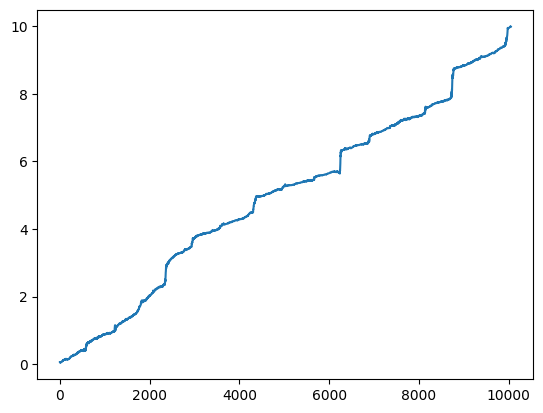

In [81]:
plt.plot(range(len(p)),p)
plt.show()

# Spread Based

In [82]:
spread = NIF - BNIF

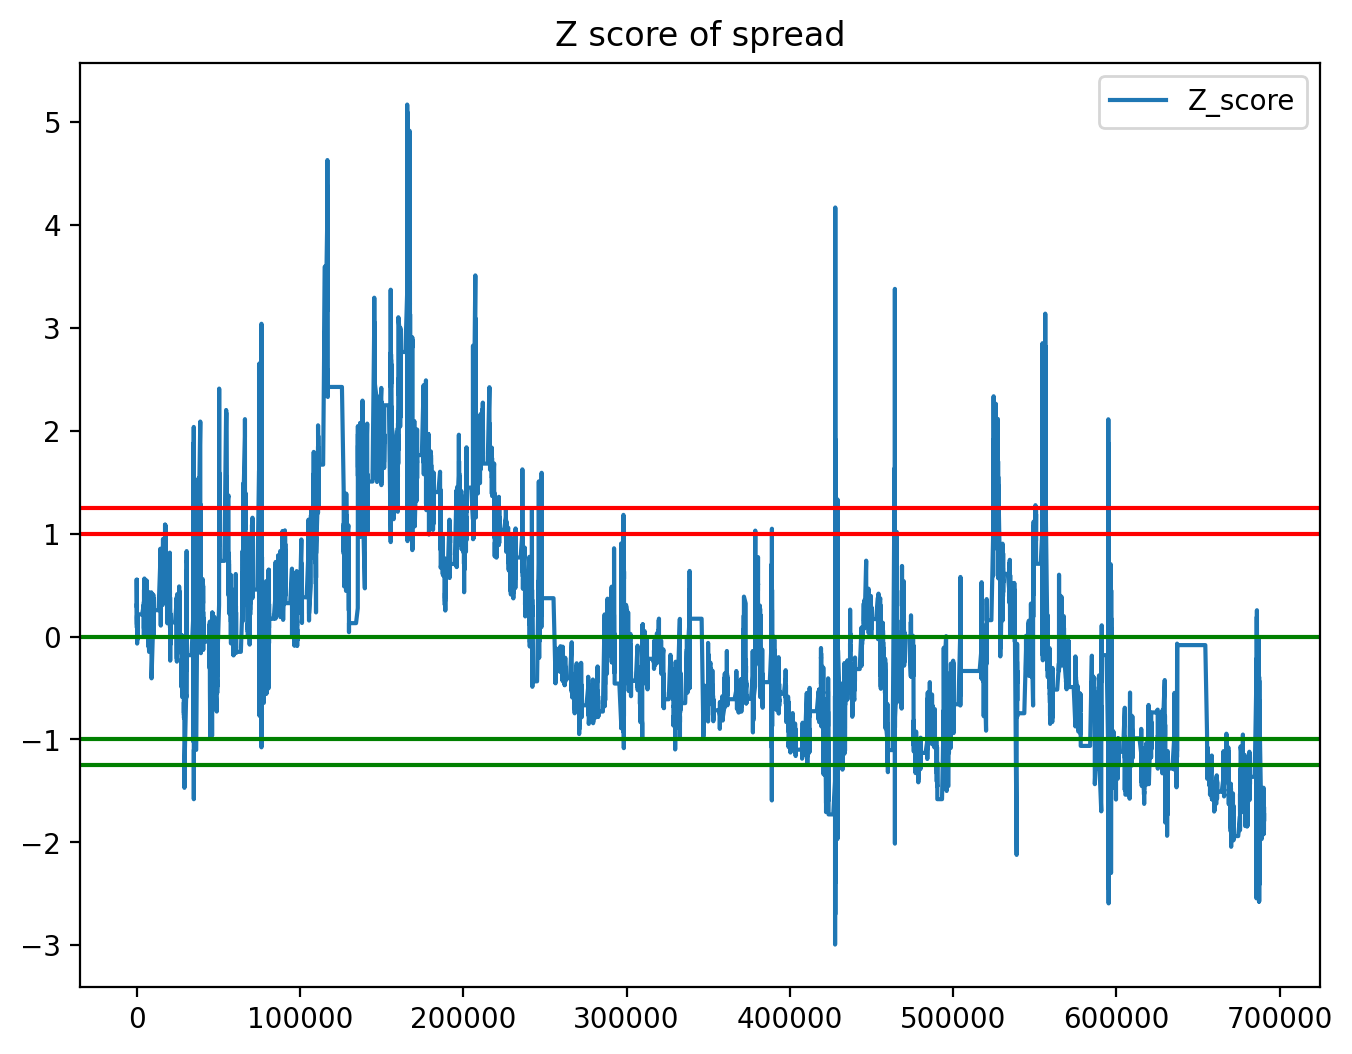

In [83]:
plt.figure(figsize=(8,6),dpi=200)
df_zscore = (spread - spread.mean())/spread.std()
plt.plot(df_zscore, label="Z_score")
plt.axhline(df_zscore.mean(),color = 'green')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of spread')
plt.show()

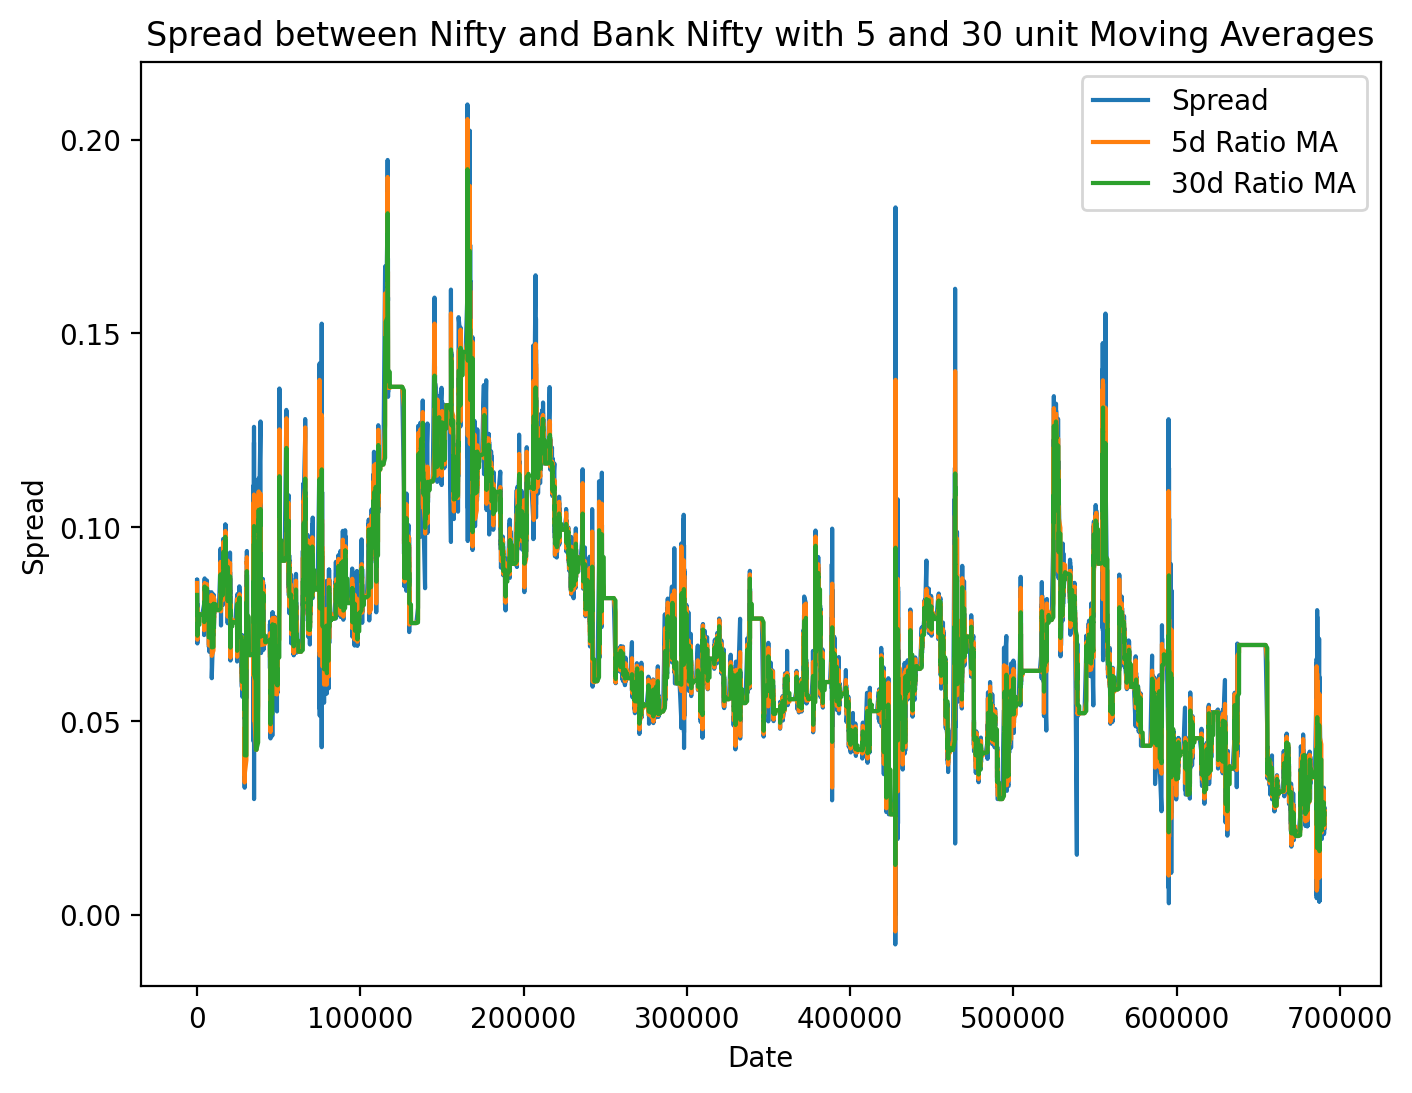

In [84]:
plt.figure(figsize=(8, 6), dpi=200)
spreads_mavg5 = spread.rolling(window=5, center=False).mean()
spreads_mavg30 = spread.rolling(window=30, center=False).mean()
std_30 = spread.rolling(window=30, center=False).std()
zscore_30_5 = (spreads_mavg5 - spreads_mavg30)/std_30
plt.plot(spread.index, spread.values)
plt.plot(spreads_mavg5.index, spreads_mavg5.values)
plt.plot(spreads_mavg30.index, spreads_mavg30.values)
plt.legend(['Spread', '5d Ratio MA', '30d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Spread')
plt.title('Spread between Nifty and Bank Nifty with 5 and 30 unit Moving Averages')
plt.show()

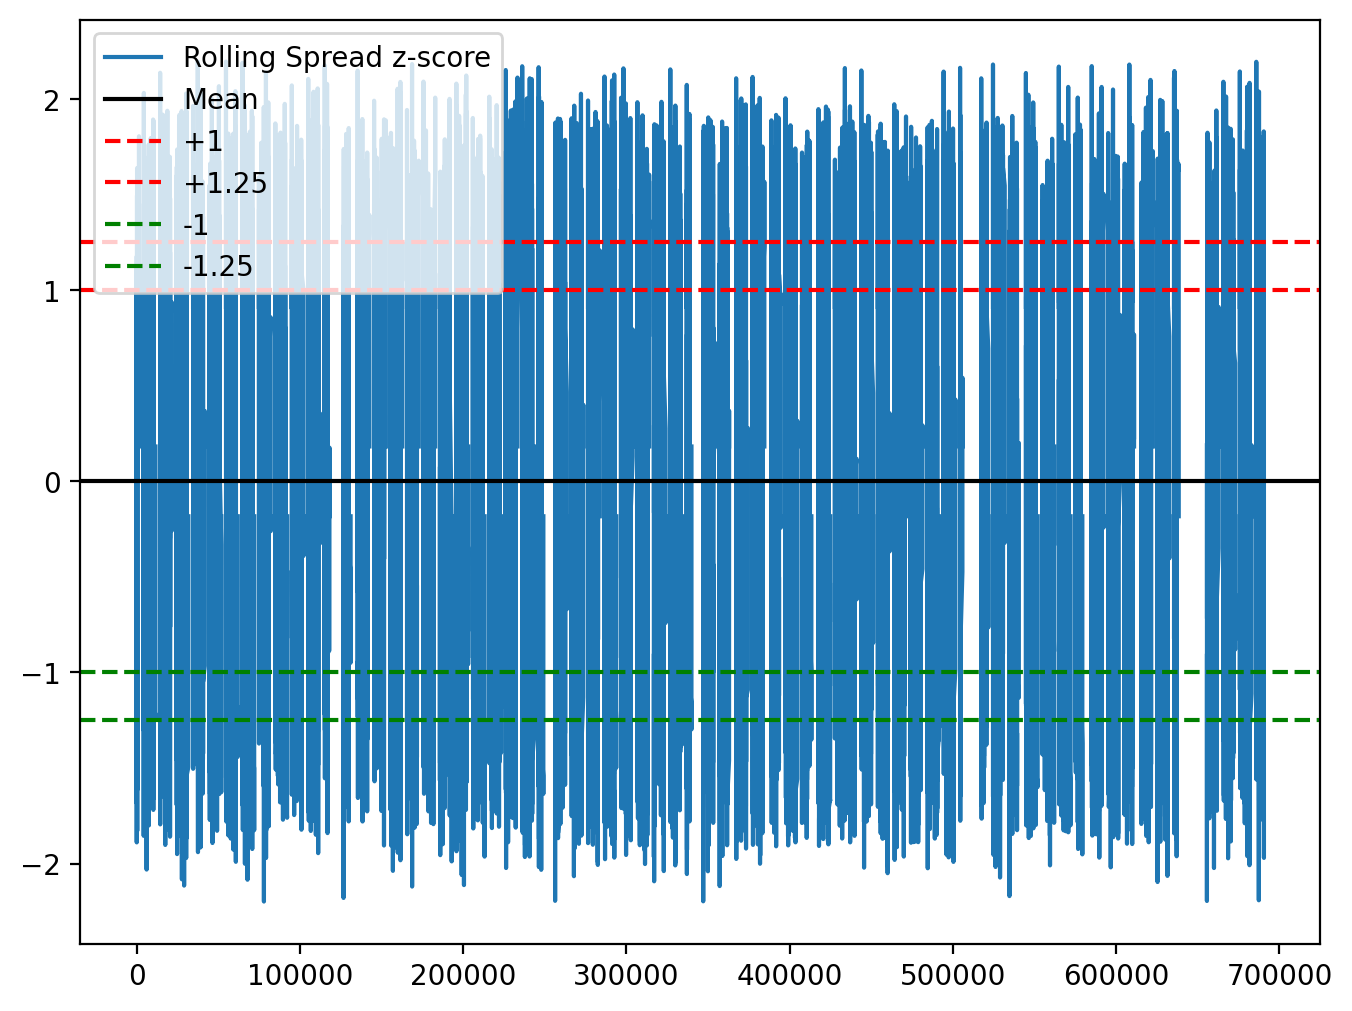

In [85]:
plt.figure(figsize=(8, 6), dpi=200)
zscore_30_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Spread z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

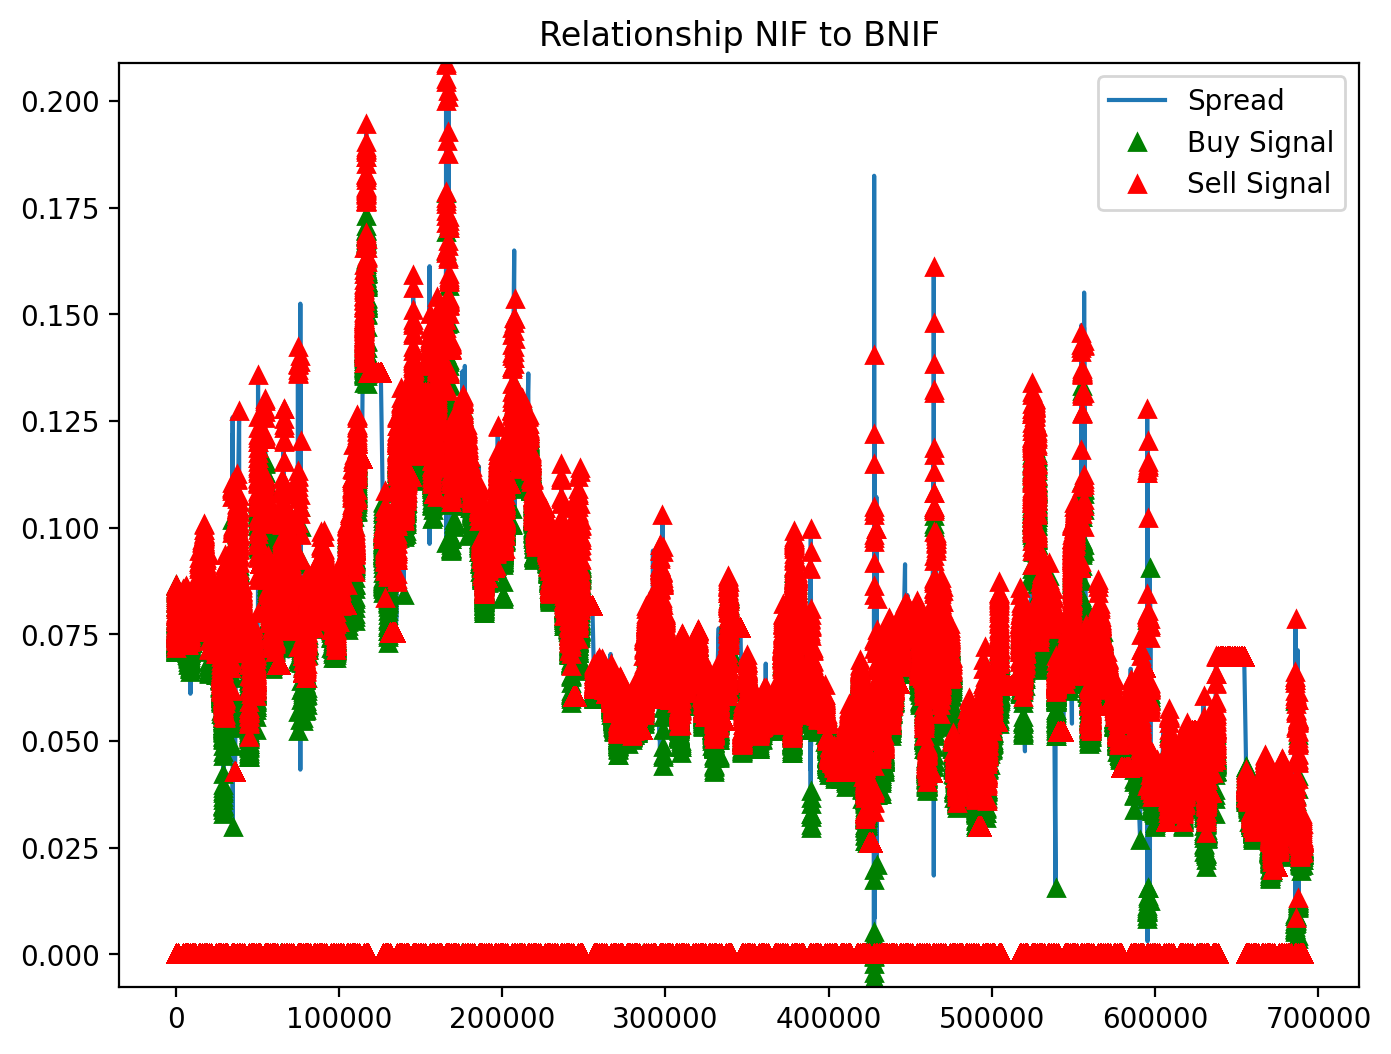

In [86]:
plt.figure(figsize=(8, 6), dpi=200)
spread.plot()
buy = spread.copy()
sell = spread.copy()
buy[zscore_30_5>-1] = 0
sell[zscore_30_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, spread.min(), spread.max()))
plt.legend(['Spread', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship NIF to BNIF')
plt.show()

# Another Strategy


Below is the other approach I first used for Trading Strategy. However the problem is that it is making much more frequent Trades.


In [ ]:
# Initialize variables for tracking trades and total profit
total_profit = 0
in_trade = False
entry_price = 0
profit = []
# Iterate through Z-score values and corresponding spread prices

for z_score, spread_price, TTE in zip(zscore_20_5,spread, df['TTE']):
    # Buy signal: Z-score < -1 (buy when Z-score crosses above -1)
    profit.append(total_profit)
    if z_score < -1 and not in_trade:
        entry_price = spread_price  # Set entry price
        in_trade = True  # Mark position as entered
    # Sell signal: Z-score < 1 (sell when Z-score crosses below 1)
    elif z_score > 1 and in_trade:
        exit_price = spread_price  # Set exit price
        profit_loss = exit_price - entry_price  # Calculate profit/loss
        total_profit += profit_loss  # Add to total profit/loss
        in_trade = False  # Mark position as exited
    elif TTE<5:
        exit_price = spread_price
        profit_loss = exit_price - entry_price
        total_profit += profit_loss
        in_trade = False


# Print total profit (negative value indicates loss)
print("Total Profit/Loss:", total_profit)


Total Profit/Loss: 151.19882104997475


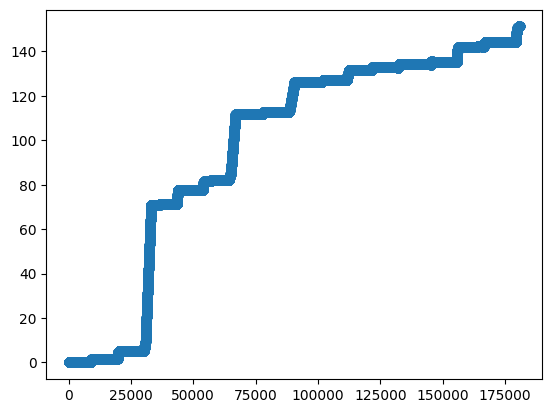

In [ ]:
plt.scatter(range(len(profit)),profit)
plt.show()

In [ ]:
# Initialize variables for tracking trades and total profit
total_profit = 0
in_trade = False
entry_price = 0
profit = []
# Iterate through Z-score values and corresponding spread prices

for z_score, spread_price, TTE in zip(zscore_20_5,spread, df['TTE']):
    # Buy signal: Z-score < -1 (buy when Z-score crosses above -1)
    profit.append(total_profit)
    if z_score < -1 and not in_trade:
        entry_price = spread_price  # Set entry price
        in_trade = True  # Mark position as entered
    # Sell signal: Z-score < 1 (sell when Z-score crosses below 1)
    elif z_score > 1 and in_trade:
        exit_price = spread_price  # Set exit price
        profit_loss = exit_price - entry_price  # Calculate profit/loss
        total_profit += profit_loss  # Add to total profit/loss
        in_trade = False  # Mark position as exited



# Print total profit (negative value indicates loss)
print("Total Profit/Loss:", total_profit)


Total Profit/Loss: 5.025853399999998


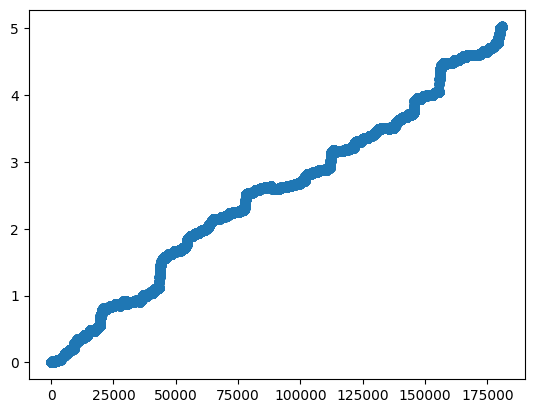

In [ ]:
plt.scatter(range(len(profit)),profit)
plt.show()

# Ratio Based Model

Text(0.5, 1.0, 'Price Ratio between Nifty and Bank Nifty')

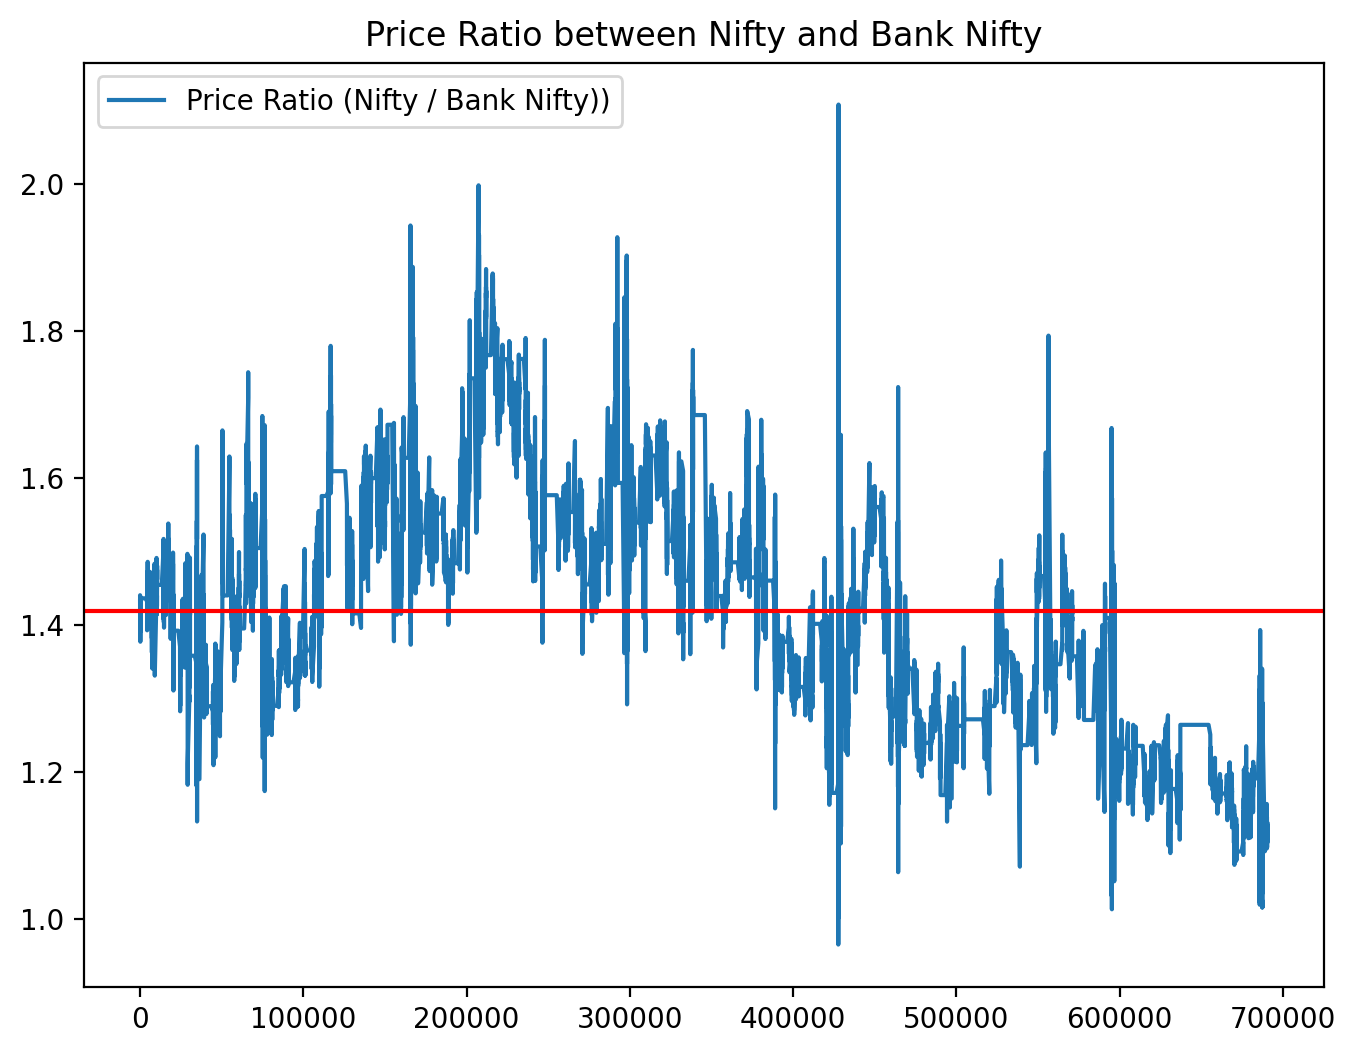

In [87]:
plt.figure(figsize=(8, 6), dpi=200)
ratio = NIF / BNIF
plt.plot(ratio, label = 'Price Ratio (Nifty / Bank Nifty))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between Nifty and Bank Nifty")

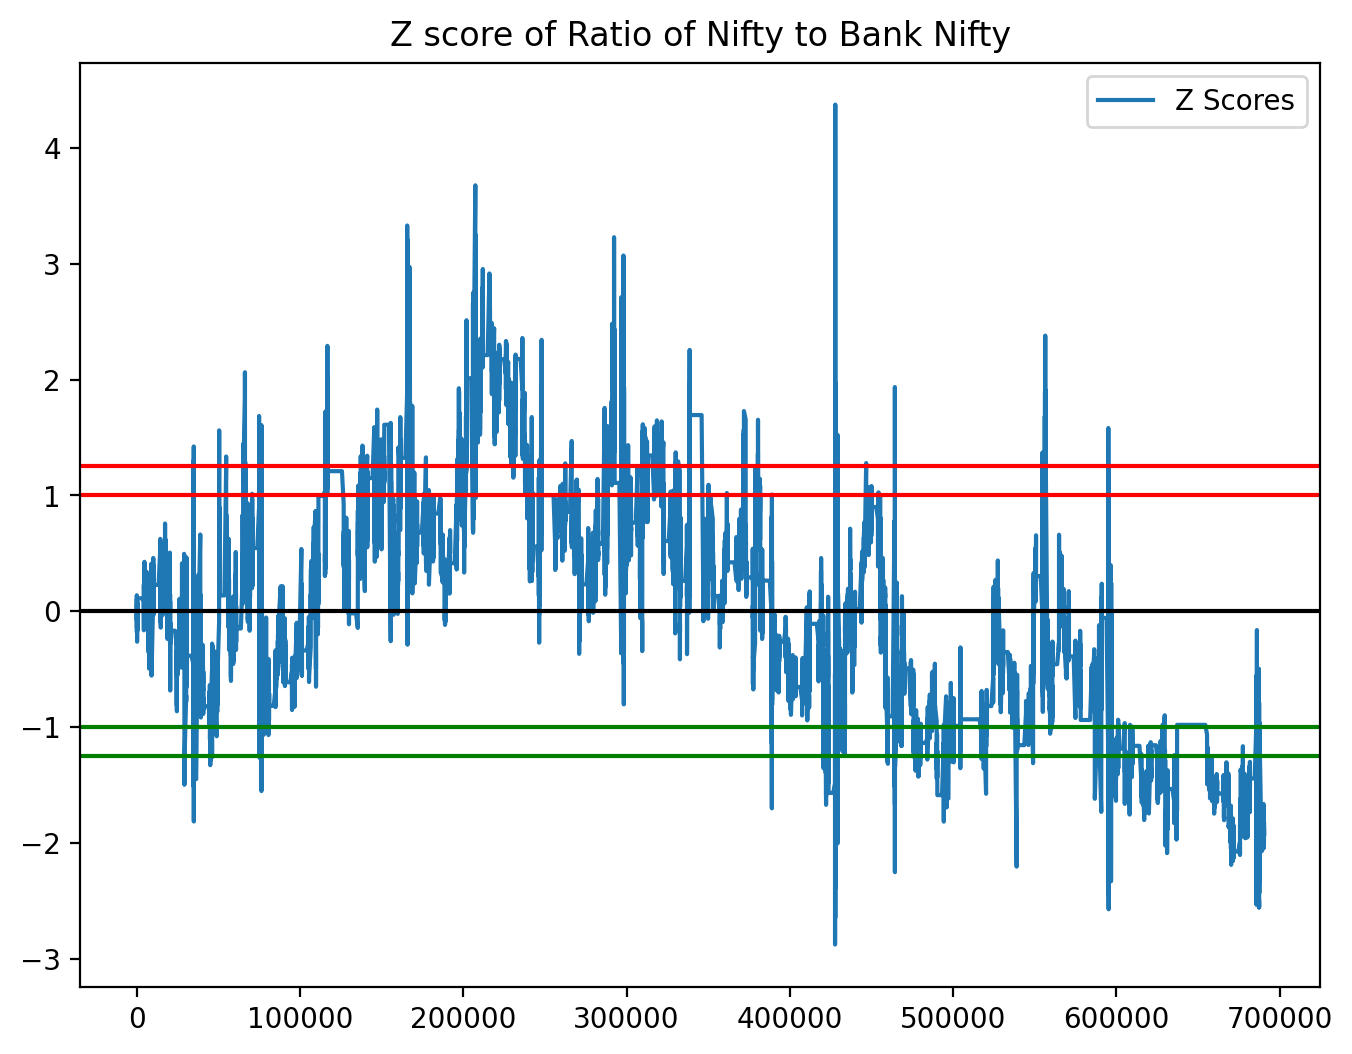

In [88]:
plt.figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of Nifty to Bank Nifty')
plt.show()

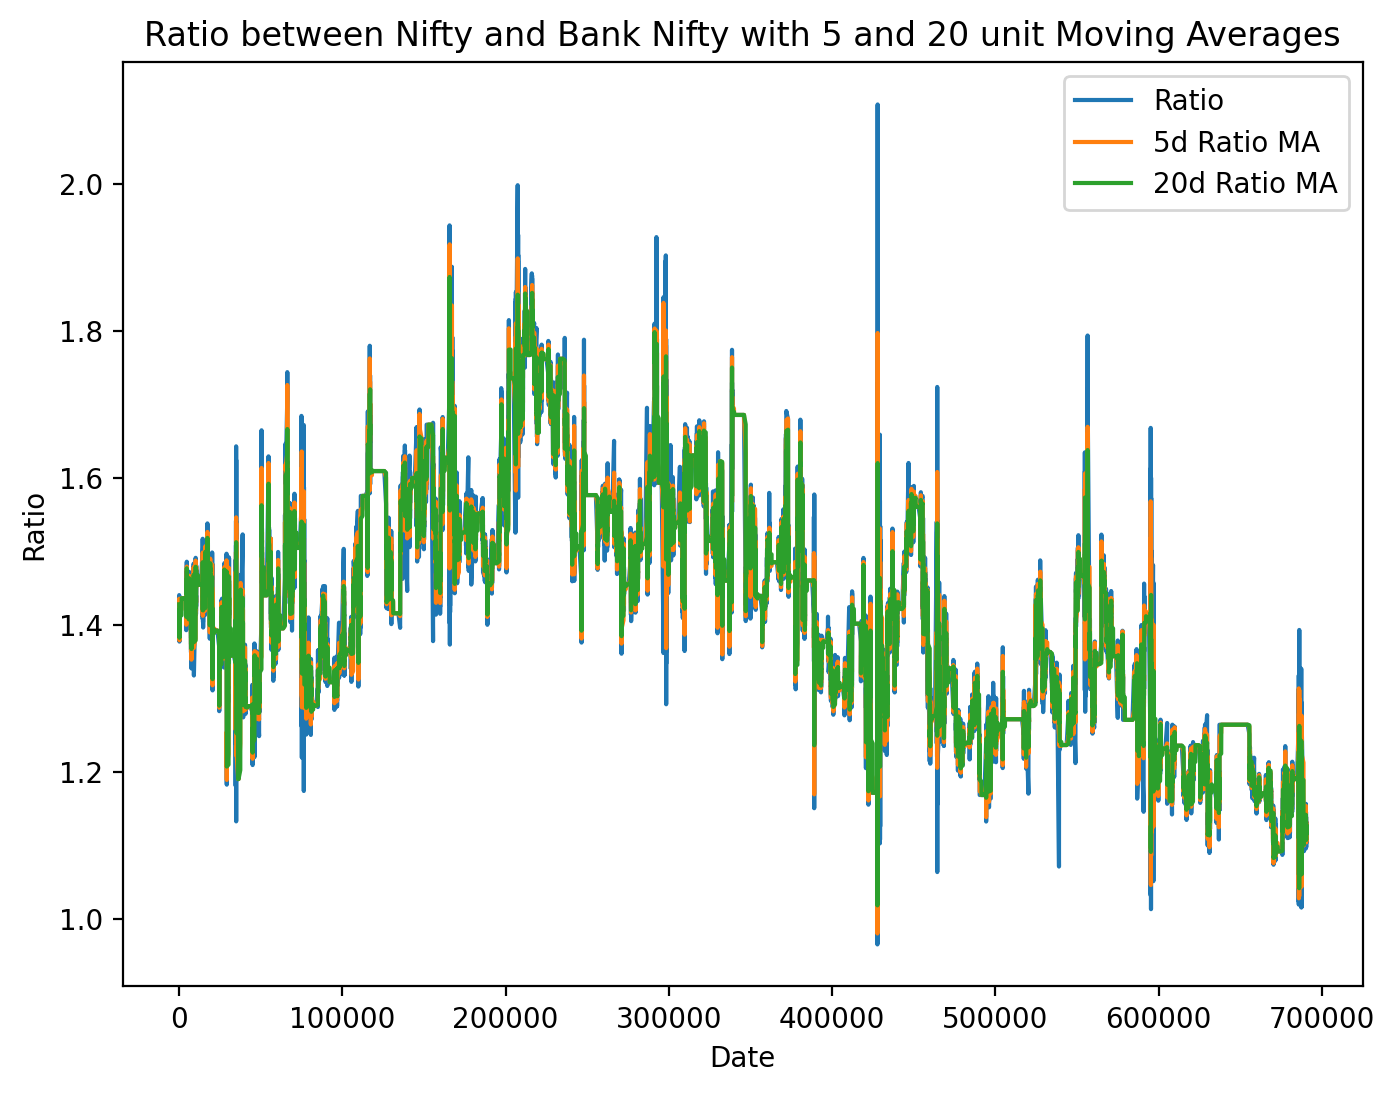

In [89]:
plt.figure(figsize=(8, 6), dpi=200)
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.title('Ratio between Nifty and Bank Nifty with 5 and 20 unit Moving Averages')
plt.show()

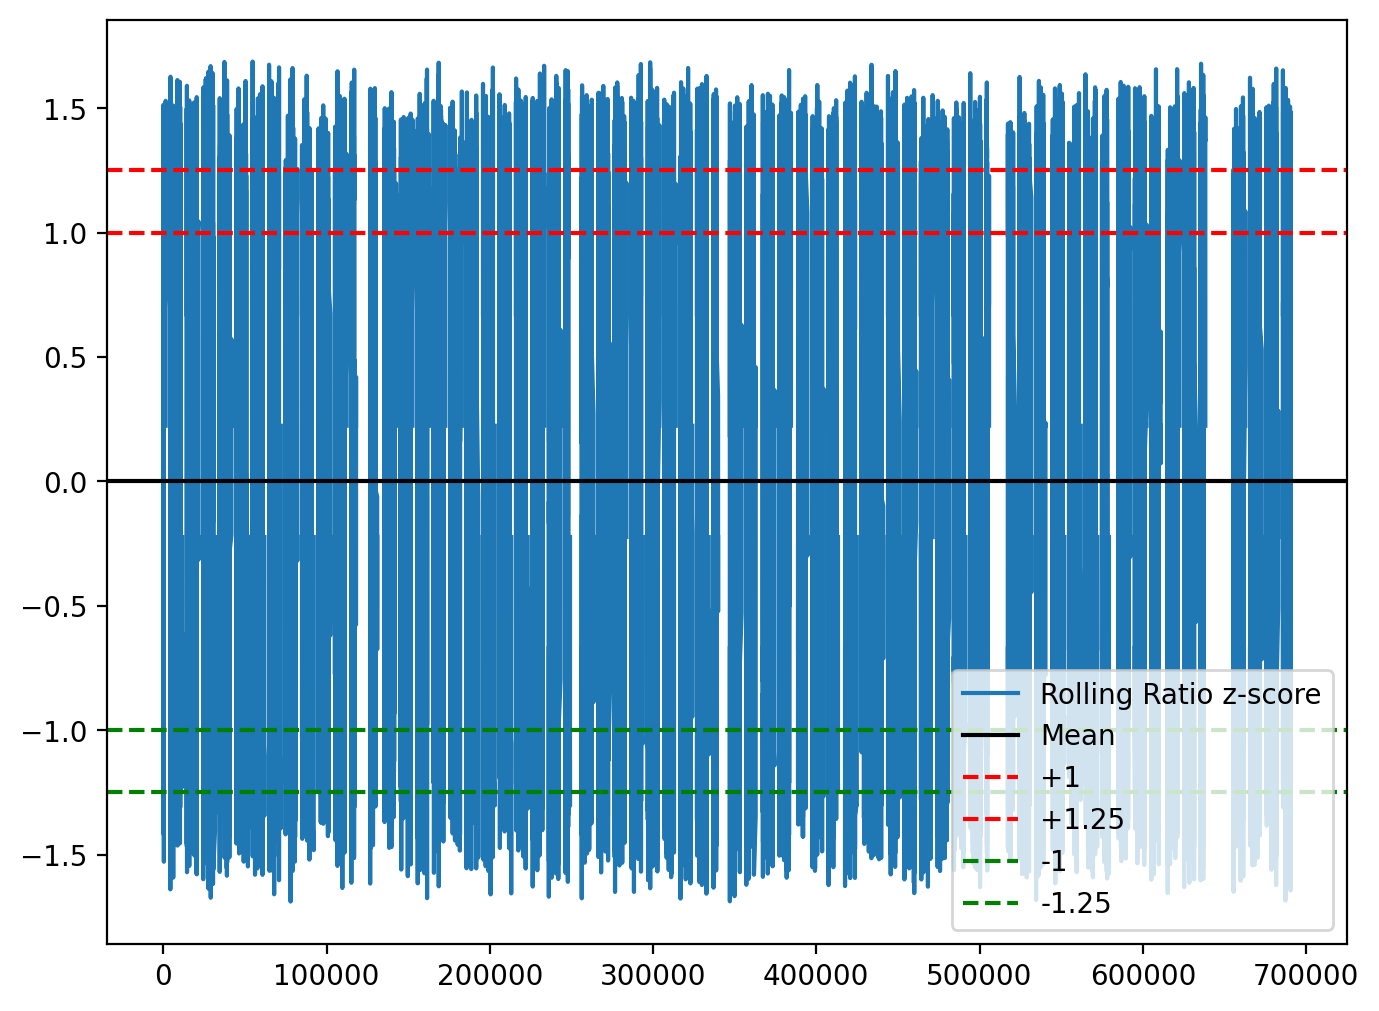

In [90]:
plt.figure(figsize=(8, 6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

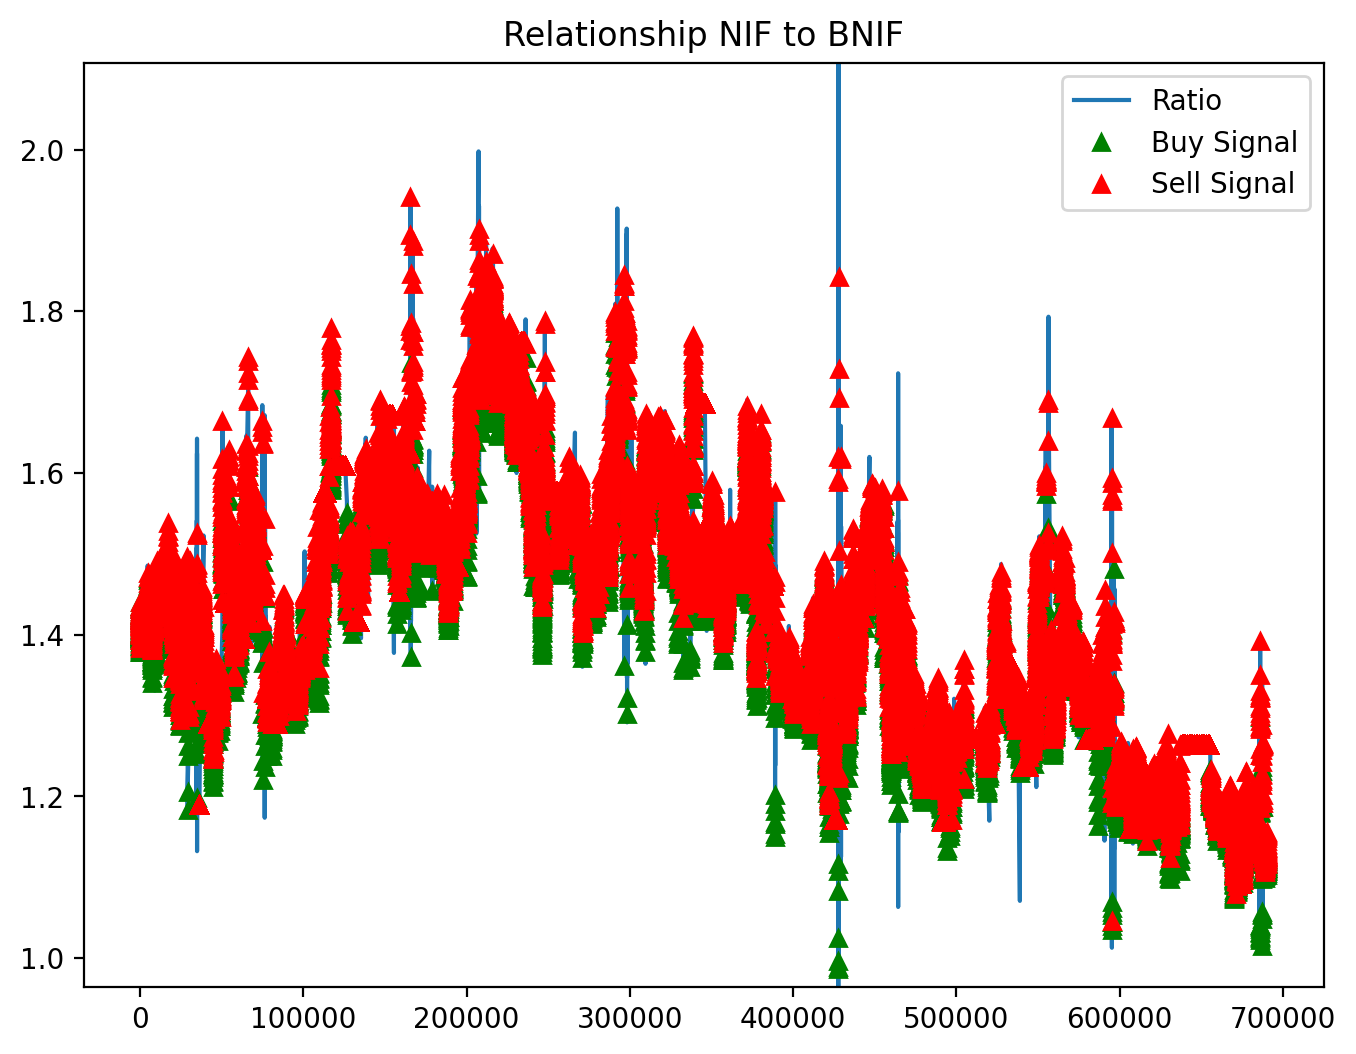

In [91]:
plt.figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship NIF to BNIF')
plt.show()

# Random Forest Model


In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [93]:
spread = df['A'] - df['B']

In [94]:
df['Spread'] = spread
df['Spread_5d_mean'] = spread.rolling(window=5).mean()
df['Spread_20d_mean'] = spread.rolling(window=20).mean()
df['Spread_std_20d'] = spread.rolling(window=20).std()

In [95]:
X = df[['A', 'B', 'TTE']]
y = df['Spread']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [96]:
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 10, 15]}
rf_model = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3)
rf_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [50, 100, 200]})

In [101]:
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.2376875913707685e-07


In [98]:
df['Predicted_Spread'] = rf_model.predict(X)
df['Z_Score'] = (df['Spread'] - df['Spread_20d_mean']) / df['Spread_std_20d']

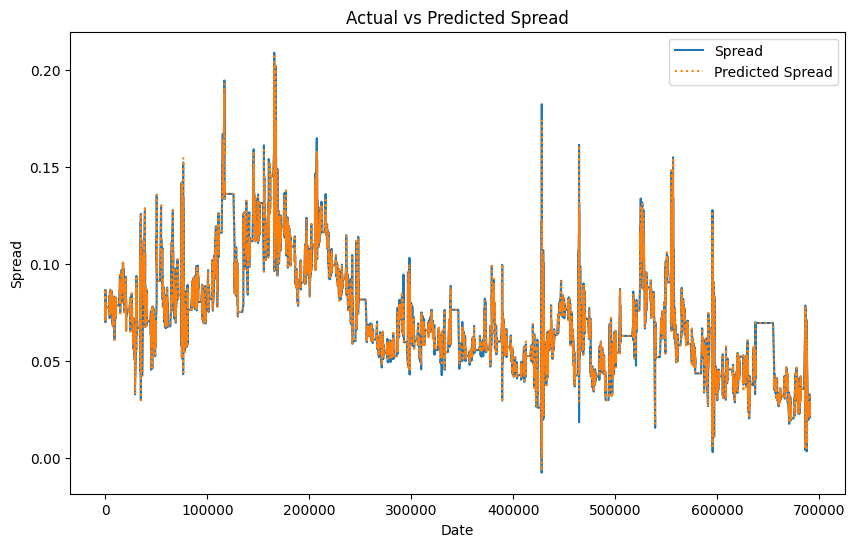

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(df['Spread'], label='Spread')
plt.plot(df['Predicted_Spread'], label='Predicted Spread',linestyle=":")
plt.legend()
plt.title('Actual vs Predicted Spread')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.show()

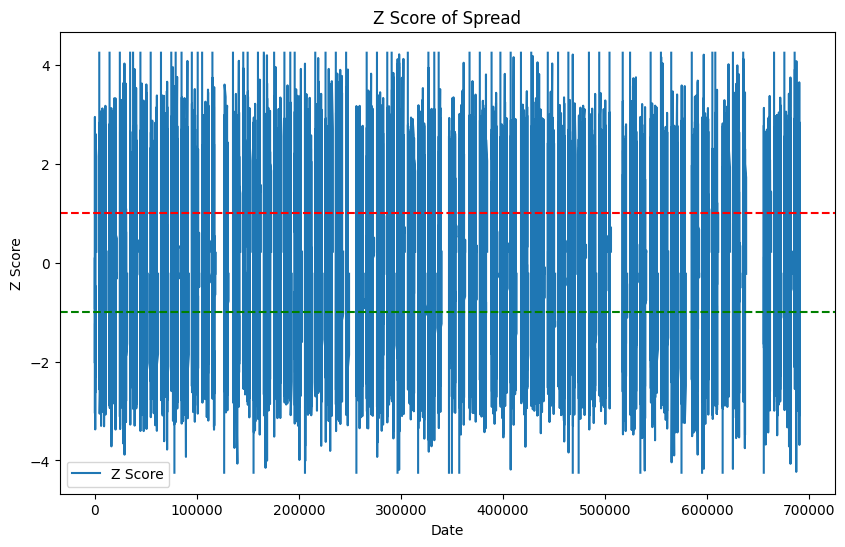

In [103]:
plt.figure(figsize=(10, 6))
plt.plot( df['Z_Score'], label='Z Score')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend()
plt.title('Z Score of Spread')
plt.xlabel('Date')
plt.ylabel('Z Score')
plt.show()

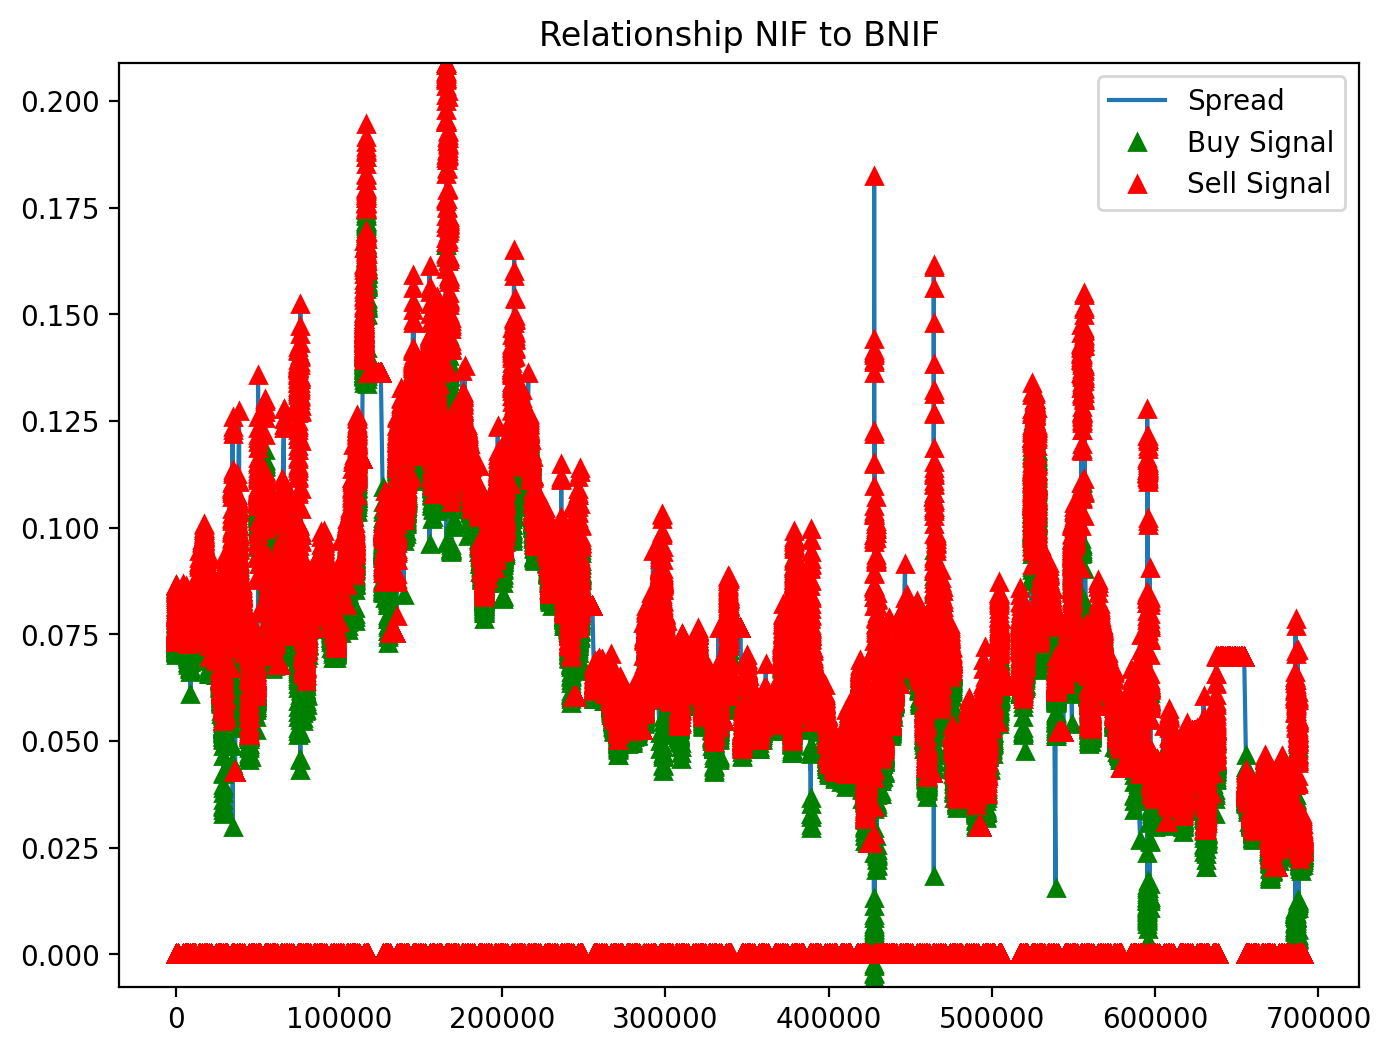

In [104]:
plt.figure(figsize=(8, 6), dpi=200)
spread.plot()
buy = df['Spread'].copy()
sell = df['Spread'].copy()
buy[df['Z_Score']>-1] = 0
sell[df['Z_Score']<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, spread.min(), spread.max()))
plt.legend(['Spread', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship NIF to BNIF')
plt.show()